In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('Axis Bank Data.xlsx')


In [3]:
data.head()

,Date,Open Price (Current Day),Close Price (Current Day),Volume (Current Day),Nifty Index (Current Day)
0,2018-05-10,548.500000,547.650024,11415139.0,10779.650391
1,2018-05-11,548.599976,553.299988,4960854.0,10741.950195
2,2018-05-14,551.200012,551.900024,4999526.0,10815.150391
3,2018-05-15,548.000000,549.700012,6752759.0,10812.599609
4,2018-05-16,545.000000,550.000000,9929095.0,10751.950195


In [4]:
data["Close Price (Previous Day)"] = data["Close Price (Current Day)"].shift(periods=1)

In [5]:
data["Volume (Previous Day)"] = data["Volume (Current Day)"].shift(periods=1)

In [6]:
data.head()

,Date,Open Price (Current Day),Close Price (Current Day),Volume (Current Day),Nifty Index (Current Day),Close Price (Previous Day),Volume (Previous Day)
0,2018-05-10,548.500000,547.650024,11415139.0,10779.650391,NaN,NaN
1,2018-05-11,548.599976,553.299988,4960854.0,10741.950195,547.650024,11415139.0
2,2018-05-14,551.200012,551.900024,4999526.0,10815.150391,553.299988,4960854.0
3,2018-05-15,548.000000,549.700012,6752759.0,10812.599609,551.900024,4999526.0
4,2018-05-16,545.000000,550.000000,9929095.0,10751.950195,549.700012,6752759.0


In [7]:
data = data.drop(columns=["Volume (Current Day)","Close Price (Current Day)"])
data.head()

,Date,Open Price (Current Day),Nifty Index (Current Day),Close Price (Previous Day),Volume (Previous Day)
0,2018-05-10,548.500000,10779.650391,NaN,NaN
1,2018-05-11,548.599976,10741.950195,547.650024,11415139.0
2,2018-05-14,551.200012,10815.150391,553.299988,4960854.0
3,2018-05-15,548.000000,10812.599609,551.900024,4999526.0
4,2018-05-16,545.000000,10751.950195,549.700012,6752759.0


In [8]:
data.tail()

,Date,Open Price (Current Day),Nifty Index (Current Day),Close Price (Previous Day),Volume (Previous Day)
733,2021-05-03,706.0,14481.049805,714.900024,23011654.0
734,2021-05-04,704.0,14687.250000,702.750000,13752878.0
735,2021-05-05,709.0,14604.150391,700.349976,11980155.0
736,2021-05-06,718.0,14668.349609,717.200012,11155033.0
737,2021-05-07,721.0,14816.849609,715.750000,9484934.0


# Data Exploration

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 5 columns):
Date                          738 non-null datetime64[ns]
Open Price (Current Day)      736 non-null float64
Nifty Index (Current Day)     734 non-null float64
Close Price (Previous Day)    735 non-null float64
Volume (Previous Day)         735 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 28.9 KB


In [10]:
data.shape

(738, 5)

In [11]:
data.isnull().sum()

Date                          0
Open Price (Current Day)      2
Nifty Index (Current Day)     4
Close Price (Previous Day)    3
Volume (Previous Day)         3
dtype: int64


# Treating Null Values

In [12]:
data.fillna(method = "ffill", inplace = True)

In [13]:
data.isnull().sum()

Date                          0
Open Price (Current Day)      0
Nifty Index (Current Day)     0
Close Price (Previous Day)    1
Volume (Previous Day)         1
dtype: int64

In [14]:
data.head()

,Date,Open Price (Current Day),Nifty Index (Current Day),Close Price (Previous Day),Volume (Previous Day)
0,2018-05-10,548.500000,10779.650391,NaN,NaN
1,2018-05-11,548.599976,10741.950195,547.650024,11415139.0
2,2018-05-14,551.200012,10815.150391,553.299988,4960854.0
3,2018-05-15,548.000000,10812.599609,551.900024,4999526.0
4,2018-05-16,545.000000,10751.950195,549.700012,6752759.0


In [15]:
data.fillna(method="bfill", inplace=True)

In [16]:
data.isnull().sum()

Date                          0
Open Price (Current Day)      0
Nifty Index (Current Day)     0
Close Price (Previous Day)    0
Volume (Previous Day)         0
dtype: int64

In [17]:
data.head()

,Date,Open Price (Current Day),Nifty Index (Current Day),Close Price (Previous Day),Volume (Previous Day)
0,2018-05-10,548.500000,10779.650391,547.650024,11415139.0
1,2018-05-11,548.599976,10741.950195,547.650024,11415139.0
2,2018-05-14,551.200012,10815.150391,553.299988,4960854.0
3,2018-05-15,548.000000,10812.599609,551.900024,4999526.0
4,2018-05-16,545.000000,10751.950195,549.700012,6752759.0


In [18]:
data.describe()

,Open Price (Current Day),Nifty Index (Current Day),Close Price (Previous Day),Volume (Previous Day)
count,738.000000,738.000000,738.000000,7.380000e+02
mean,621.025611,11605.968577,620.143090,1.684932e+07
std,122.850057,1440.753631,122.974438,1.355056e+07
min,293.500000,7735.149902,303.149994,1.528117e+06
25%,528.800018,10807.362549,531.025024,7.687604e+06
50%,644.800018,11382.250000,645.625000,1.203882e+07
75%,728.587509,12003.512451,727.975006,2.127965e+07
max,824.000000,15371.450195,822.799988,9.618623e+07


 **After detecting and treating null values, we came across with negligible, hence we dropped it.**

## Detecting Outliers

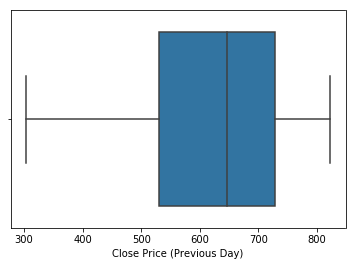

In [19]:
sns.boxplot(x = "Close Price (Previous Day)", data = data)

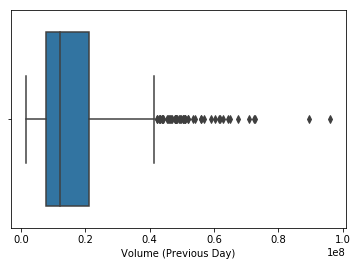

In [20]:
sns.boxplot(x = "Volume (Previous Day)", data = data)

Using IQR - Interquartile Range to treat outliers.

IQR is the range between the first and the third quartiles namely Q1 and Q3: IQR = Q3 – Q1. The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.

In [21]:
Q1 = data["Volume (Previous Day)"].quantile(0.25)
Q3 = data["Volume (Previous Day)"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

13592044.75


In [22]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print("Value below {} are outliers" .format(low_lim))
print("Value above {} are outliers" .format(up_lim))

Value below -12700463.125 are outliers
Value above 41667715.875 are outliers


In [23]:
outliers_u = data[(data["Volume (Previous Day)"] > up_lim)]
outliers_u.head()

,Date,Open Price (Current Day),Nifty Index (Current Day),Close Price (Previous Day),Volume (Previous Day)
181,2019-01-31,697.250000,10690.549805,690.950012,46912230.0
302,2019-08-01,673.950012,11060.200195,674.099976,55836793.0
342,2019-10-03,675.000000,11322.250000,679.150024,49442205.0
460,2020-03-25,293.500000,7735.149902,303.149994,50681510.0
461,2020-03-26,335.950012,8451.000000,326.799988,51993973.0


In [24]:
outliers_u.shape

(51, 5)

In [25]:
outliers_l = data[(data["Volume (Previous Day)"] < low_lim)]
outliers_l.head()

,Date,Open Price (Current Day),Nifty Index (Current Day),Close Price (Previous Day),Volume (Previous Day)


In [26]:
outliers_l.shape

(0, 5)

In [27]:
data = data.drop(outliers_u.index)
data.head()

,Date,Open Price (Current Day),Nifty Index (Current Day),Close Price (Previous Day),Volume (Previous Day)
0,2018-05-10,548.500000,10779.650391,547.650024,11415139.0
1,2018-05-11,548.599976,10741.950195,547.650024,11415139.0
2,2018-05-14,551.200012,10815.150391,553.299988,4960854.0
3,2018-05-15,548.000000,10812.599609,551.900024,4999526.0
4,2018-05-16,545.000000,10751.950195,549.700012,6752759.0


In [28]:
data.shape

(687, 5)

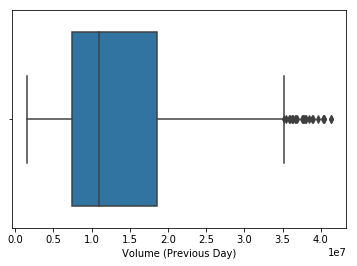

In [29]:
sns.boxplot(x = "Volume (Previous Day)", data = data)

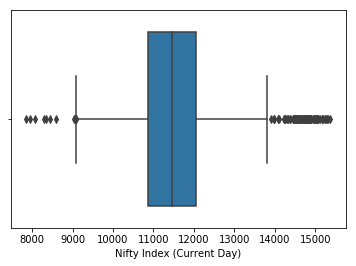

In [30]:
sns.boxplot(x = "Nifty Index (Current Day)", data = data)

In [31]:
Q1 = data["Nifty Index (Current Day)"].quantile(0.25)
Q3 = data["Nifty Index (Current Day)"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

1183.224609500001


In [32]:
low_lim1 = Q1 - 1.5 * IQR
up_lim1 = Q3 + 1.5 * IQR
print("Value below {} are outliers" .format(low_lim1))
print("Value above {} are outliers" .format(up_lim1))

Value below 9085.513183249997 are outliers
Value above 13818.411621250001 are outliers


In [33]:
outliers_up = data[(data["Nifty Index (Current Day)"] > up_lim1)]
outliers_up.head()

,Date,Open Price (Current Day),Nifty Index (Current Day),Close Price (Previous Day),Volume (Previous Day)
650,2020-12-29,620.700012,13910.349609,617.650024,8444506.0
651,2020-12-30,632.250000,13980.900391,630.200012,13765454.0
652,2020-12-31,622.400024,13970.000000,625.099976,10262221.0
653,2021-01-01,620.250000,13970.000000,620.450012,12306502.0
654,2021-01-04,627.799988,14104.349609,623.799988,6047062.0


In [34]:
outliers_low = data[(data["Nifty Index (Current Day)"] < low_lim1)]
outliers_low.head()

,Date,Open Price (Current Day),Nifty Index (Current Day),Close Price (Previous Day),Volume (Previous Day)
456,2020-03-19,441.049988,8063.299805,473.450012,36240904.0
457,2020-03-20,431.399994,8284.450195,428.250000,33243997.0
458,2020-03-23,385.350006,7945.700195,428.149994,30764236.0
459,2020-03-24,331.950012,7848.299805,308.649994,37622635.0
465,2020-04-01,376.250000,8584.099609,379.000000,34637148.0


In [35]:
outliers_up.shape

(83, 5)

In [36]:
outliers_low.shape

(11, 5)

In [37]:
data = data.drop(outliers_up.index)
data.head()

,Date,Open Price (Current Day),Nifty Index (Current Day),Close Price (Previous Day),Volume (Previous Day)
0,2018-05-10,548.500000,10779.650391,547.650024,11415139.0
1,2018-05-11,548.599976,10741.950195,547.650024,11415139.0
2,2018-05-14,551.200012,10815.150391,553.299988,4960854.0
3,2018-05-15,548.000000,10812.599609,551.900024,4999526.0
4,2018-05-16,545.000000,10751.950195,549.700012,6752759.0


In [38]:
data = data.drop(outliers_low.index)
data.head()

,Date,Open Price (Current Day),Nifty Index (Current Day),Close Price (Previous Day),Volume (Previous Day)
0,2018-05-10,548.500000,10779.650391,547.650024,11415139.0
1,2018-05-11,548.599976,10741.950195,547.650024,11415139.0
2,2018-05-14,551.200012,10815.150391,553.299988,4960854.0
3,2018-05-15,548.000000,10812.599609,551.900024,4999526.0
4,2018-05-16,545.000000,10751.950195,549.700012,6752759.0


In [39]:
data.shape

(593, 5)

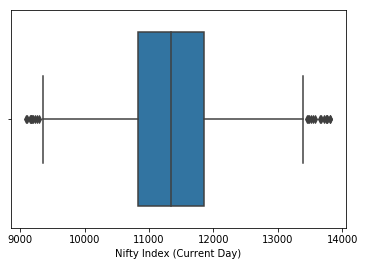

In [40]:
sns.boxplot(x = "Nifty Index (Current Day)", data = data)



## Relationship Analysis

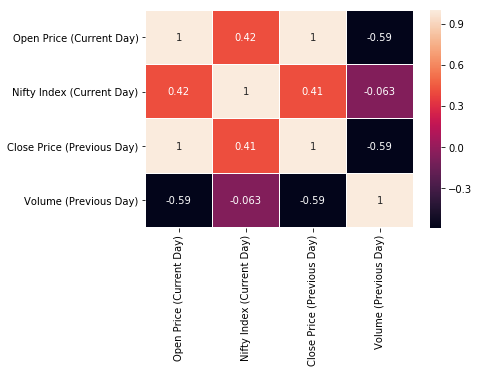

In [41]:
sns.heatmap(data.corr(), annot = True, linewidths = 0.1)

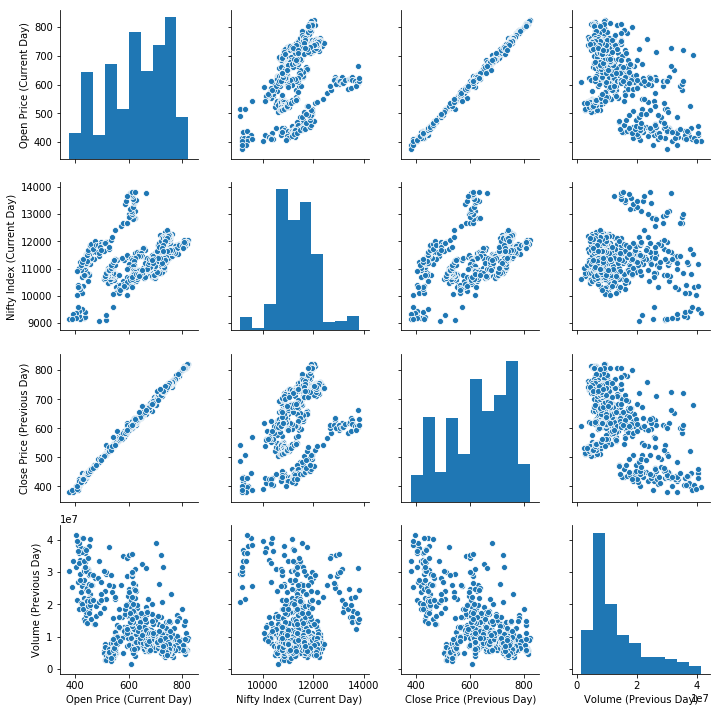

In [42]:
sns.pairplot(data)

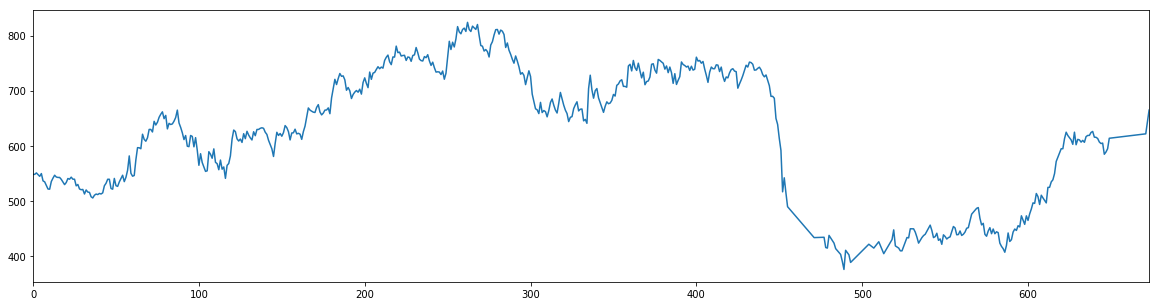

In [43]:
data["Open Price (Current Day)"].plot(figsize = (20,5))

# Data Modeling and Evaluation

In [44]:
X = data[["Close Price (Previous Day)","Volume (Previous Day)", "Nifty Index (Current Day)"]]
Y = data[["Open Price (Current Day)"]]

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4)

In [46]:

nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples,nx*ny))

ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
X_test.shape

In [ ]:
Y_test.shape

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, Y_train)

In [ ]:
print(regressor)

In [ ]:
predictions = regressor.predict(X_test)

In [ ]:

print(predictions)

In [ ]:
predictions = predictions.reshape(-1,1)

In [ ]:
predictions.shape

# **Now we have Predicted and actual value of "Open Price (Current Day)"**

Predicted Value = "predictions"

Actual value = "Y_test"

In [ ]:
plt.scatter(Y_test, predictions)

In [ ]:
from sklearn import metrics

In [ ]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test, predictions))
print("Mean Squared Error: ", metrics.mean_squared_error(Y_test, predictions))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, predictions)
r2

In [ ]:
Tolerance = 1-r2
Tolerance

In [ ]:
from sklearn.externals import joblib
joblib.dump(regressor, "Model_Axis.pkl")

In [ ]:
model = joblib.load("Model_Axis.pkl")

print(model)

In [ ]:
import pandas_datareader as pdr
import datetime

In [ ]:
start = datetime.datetime(2018,5,10)
end = datetime.datetime(2021,5,7)

In [ ]:
data_v = pdr.get_data_yahoo("AXISBANK", start, end)
data_v.head()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('ICICIBANK.xlsx')


data["Close Price (Previous Day)"] = data["Close"].shift(periods=1)

data["Volume (Previous Day)"] = data["Volume"].shift(periods=1)


data = data.drop(columns=["Volume","Close"])


# Treating Null Values

data.fillna(method = "ffill", inplace = True)


data.fillna(method="bfill", inplace=True)


print(data.head(2))
#After detecting and treating null values, we came across with negligible, hence we dropped it.



Q1 = data["Volume (Previous Day)"].quantile(0.25)
Q3 = data["Volume (Previous Day)"].quantile(0.75)
IQR = Q3 - Q1

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR


outliers_u = data[(data["Volume (Previous Day)"] > up_lim)]


outliers_l = data[(data["Volume (Previous Day)"] < low_lim)]


data = data.drop(outliers_u.index)



Q1 = data["Nifty Index (Current Day)"].quantile(0.25)
Q3 = data["Nifty Index (Current Day)"].quantile(0.75)
IQR = Q3 - Q1


low_lim1 = Q1 - 1.5 * IQR
up_lim1 = Q3 + 1.5 * IQR


outliers_up = data[(data["Nifty Index (Current Day)"] > up_lim1)]

outliers_low = data[(data["Nifty Index (Current Day)"] < low_lim1)]




data = data.drop(outliers_up.index)

data = data.drop(outliers_low.index)


# Data Modeling and Evaluation

X = data[["Close Price (Previous Day)","Volume (Previous Day)", "Nifty Index (Current Day)"]]
Y = data[["Open"]]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4)



from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train, Y_train)


predictions = regressor.predict(X_test)

print(predictions.shape)

from sklearn import metrics

print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test, predictions))
print("Mean Squared Error: ", metrics.mean_squared_error(Y_test, predictions))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

from sklearn.metrics import r2_score
r2 = r2_score(Y_test, predictions)
print("r2 score: {}".format(r2))

Tolerance = 1-r2
print("Tolerance: {}".format(Tolerance))

from sklearn.externals import joblib
joblib.dump(regressor, "Model_ICICI.pkl")

model = joblib.load("Model_ICICI.pkl")

print(model)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('TCS.xlsx')


data["Close Price (Previous Day)"] = data["Close"].shift(periods=1)

data["Volume (Previous Day)"] = data["Volume"].shift(periods=1)


data = data.drop(columns=["Volume","Close"])


# Treating Null Values

data.fillna(method = "ffill", inplace = True)


data.fillna(method="bfill", inplace=True)

print(data.head(2))

#After detecting and treating null values, we came across with negligible, hence we dropped it.



Q1 = data["Volume (Previous Day)"].quantile(0.25)
Q3 = data["Volume (Previous Day)"].quantile(0.75)
IQR = Q3 - Q1

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR


outliers_u = data[(data["Volume (Previous Day)"] > up_lim)]


outliers_l = data[(data["Volume (Previous Day)"] < low_lim)]


data = data.drop(outliers_u.index)



Q1 = data["Nifty Index (Current Day)"].quantile(0.25)
Q3 = data["Nifty Index (Current Day)"].quantile(0.75)
IQR = Q3 - Q1


low_lim1 = Q1 - 1.5 * IQR
up_lim1 = Q3 + 1.5 * IQR


outliers_up = data[(data["Nifty Index (Current Day)"] > up_lim1)]

outliers_low = data[(data["Nifty Index (Current Day)"] < low_lim1)]




data = data.drop(outliers_up.index)

data = data.drop(outliers_low.index)


# Data Modeling and Evaluation

X = data[["Close Price (Previous Day)","Volume (Previous Day)", "Nifty Index (Current Day)"]]
Y = data[["Open"]]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4)



from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train, Y_train)


predictions = regressor.predict(X_test)

print(predictions.shape)

from sklearn import metrics

print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test, predictions))
print("Mean Squared Error: ", metrics.mean_squared_error(Y_test, predictions))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

from sklearn.metrics import r2_score
r2 = r2_score(Y_test, predictions)
print("r2 score: {}".format(r2))

Tolerance = 1-r2
print("Tolerance: {}".format(Tolerance))

from sklearn.externals import joblib
joblib.dump(regressor, "Model_TCS.pkl")

model = joblib.load("Model_TCS.pkl")

print(model)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('RELIANCE.xlsx')


data["Close Price (Previous Day)"] = data["Close"].shift(periods=1)

data["Volume (Previous Day)"] = data["Volume"].shift(periods=1)


data = data.drop(columns=["Volume","Close"])


# Treating Null Values

data.fillna(method = "ffill", inplace = True)


data.fillna(method="bfill", inplace=True)

print(data.head(2))

#After detecting and treating null values, we came across with negligible, hence we dropped it.



Q1 = data["Volume (Previous Day)"].quantile(0.25)
Q3 = data["Volume (Previous Day)"].quantile(0.75)
IQR = Q3 - Q1

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR


outliers_u = data[(data["Volume (Previous Day)"] > up_lim)]


outliers_l = data[(data["Volume (Previous Day)"] < low_lim)]


data = data.drop(outliers_u.index)



Q1 = data["Nifty Index (Current Day)"].quantile(0.25)
Q3 = data["Nifty Index (Current Day)"].quantile(0.75)
IQR = Q3 - Q1


low_lim1 = Q1 - 1.5 * IQR
up_lim1 = Q3 + 1.5 * IQR


outliers_up = data[(data["Nifty Index (Current Day)"] > up_lim1)]

outliers_low = data[(data["Nifty Index (Current Day)"] < low_lim1)]




data = data.drop(outliers_up.index)

data = data.drop(outliers_low.index)


# Data Modeling and Evaluation

X = data[["Close Price (Previous Day)","Volume (Previous Day)", "Nifty Index (Current Day)"]]
Y = data[["Open"]]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4)



from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train, Y_train)


predictions = regressor.predict(X_test)

print(predictions.shape)

from sklearn import metrics

print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test, predictions))
print("Mean Squared Error: ", metrics.mean_squared_error(Y_test, predictions))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

from sklearn.metrics import r2_score
r2 = r2_score(Y_test, predictions)
print("r2 score: {}".format(r2))

Tolerance = 1-r2
print("Tolerance: {}".format(Tolerance))

from sklearn.externals import joblib
joblib.dump(regressor, "Model_RELIANCE.pkl")

model = joblib.load("Model_RELIANCE.pkl")

print(model)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('INFY.xlsx')


data["Close Price (Previous Day)"] = data["Close"].shift(periods=1)

data["Volume (Previous Day)"] = data["Volume"].shift(periods=1)


data = data.drop(columns=["Volume","Close"])


# Treating Null Values

data.fillna(method = "ffill", inplace = True)


data.fillna(method="bfill", inplace=True)


print(data.head(2))
#After detecting and treating null values, we came across with negligible, hence we dropped it.



Q1 = data["Volume (Previous Day)"].quantile(0.25)
Q3 = data["Volume (Previous Day)"].quantile(0.75)
IQR = Q3 - Q1

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR


outliers_u = data[(data["Volume (Previous Day)"] > up_lim)]


outliers_l = data[(data["Volume (Previous Day)"] < low_lim)]


data = data.drop(outliers_u.index)



Q1 = data["Nifty Index (Current Day)"].quantile(0.25)
Q3 = data["Nifty Index (Current Day)"].quantile(0.75)
IQR = Q3 - Q1


low_lim1 = Q1 - 1.5 * IQR
up_lim1 = Q3 + 1.5 * IQR


outliers_up = data[(data["Nifty Index (Current Day)"] > up_lim1)]

outliers_low = data[(data["Nifty Index (Current Day)"] < low_lim1)]




data = data.drop(outliers_up.index)

data = data.drop(outliers_low.index)


# Data Modeling and Evaluation

X = data[["Close Price (Previous Day)","Volume (Previous Day)", "Nifty Index (Current Day)"]]
Y = data[["Open"]]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4)



from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train, Y_train)


predictions = regressor.predict(X_test)

print(predictions.shape)

from sklearn import metrics

print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test, predictions))
print("Mean Squared Error: ", metrics.mean_squared_error(Y_test, predictions))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

from sklearn.metrics import r2_score
r2 = r2_score(Y_test, predictions)
print("r2 score: {}".format(r2))

Tolerance = 1-r2
print("Tolerance: {}".format(Tolerance))

from sklearn.externals import joblib
joblib.dump(regressor, "Model_INFY.pkl")

model = joblib.load("Model_INFY.pkl")

print(model)